In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
df = pd.read_csv('loan_approval_dataset.csv')

# Check first 5 rows
print(df.head())

# Basic info
print(df.info())

# Check missing values
print(df.isnull().sum())

   loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  1760000

In [6]:
# Remove leading/trailing spaces from all column names
df.columns = df.columns.str.strip()


In [12]:
from sklearn.impute import SimpleImputer

# Numeric features
num_cols = ['loan_amount', 'loan_term', 'cibil_score', 'income_annum', 'residential_assets_value', 
            'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']
num_imputer = SimpleImputer(strategy='median')
df[num_cols] = num_imputer.fit_transform(df[num_cols])

# Categorical features
cat_cols = ['education', 'self_employed']
cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])


In [14]:
# from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in cat_cols + ['loan_status']:
    df[col] = le.fit_transform(df[col])



In [15]:
#Features & Target
X = df.drop(['loan_id', 'loan_status'], axis=1)
y = df['loan_status']


In [16]:
#Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



In [17]:
#Handle Imbalanced Data
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


In [18]:
#Train Classification Models
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train_res, y_train_res)
y_pred_log = log_model.predict(X_test)


In [20]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train_res, y_train_res)
y_pred_tree = tree_model.predict(X_test)


In [21]:
#from sklearn.metrics import classification_report, confusion_matrix

print("=== Logistic Regression ===")
print(classification_report(y_test, y_pred_log))

print("=== Decision Tree ===")
print(classification_report(y_test, y_pred_tree))


=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       531
           1       0.73      0.71      0.72       323

    accuracy                           0.79       854
   macro avg       0.78      0.78      0.78       854
weighted avg       0.79      0.79      0.79       854

=== Decision Tree ===
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       531
           1       0.98      0.95      0.97       323

    accuracy                           0.98       854
   macro avg       0.98      0.97      0.97       854
weighted avg       0.98      0.98      0.98       854



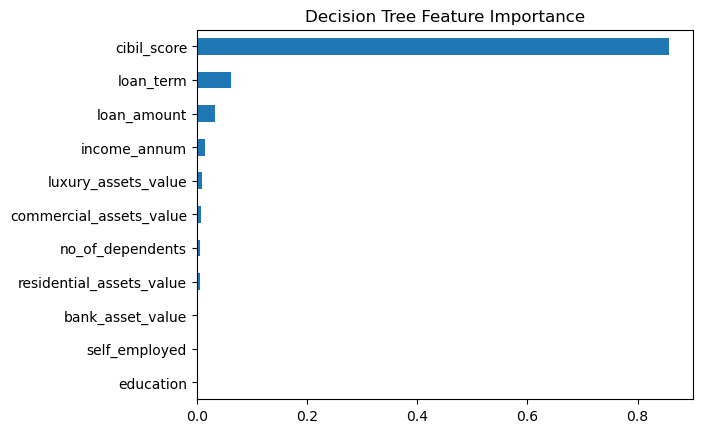

In [22]:
#Feature Importance for Decision Tree
import matplotlib.pyplot as plt

feat_importances = pd.Series(tree_model.feature_importances_, index=X.columns)
feat_importances.sort_values().plot(kind='barh')
plt.title('Decision Tree Feature Importance')
plt.show()
